In [25]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import geopandas as gpd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
edes = pd.read_csv("https://data.cityofnewyork.us/api/views/hxm3-23vy/rows.csv?accessType=DOWNLOAD")

In [27]:
edes.shape

(11417, 13)

In [28]:
edes.head()

,ENumber,E Effective Date,BOROCODE,TAXBLOCK,TAXLOT,HazMat Code,Air Code,Noise Code,HazMat Date,Air Date,Noise Date,CEQR_NUM,ULURP_NUM
0,E-1,04/28/1983,3,319,1,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
1,E-1,04/28/1983,3,319,10,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
2,E-1,04/28/1983,3,319,11,0,0,1,NaN,NaN,NaN,82-252K,830178 ZMK
3,E-1,04/28/1983,3,319,12,0,0,1,NaN,NaN,05/31/2018,82-252K,830178 ZMK
4,E-1,04/28/1983,3,319,13,0,0,1,NaN,NaN,05/31/2018,82-252K,830178 ZMK


In [29]:
edes_noise = edes[edes['Noise Code']==1]

In [30]:
edes_noise_open = edes_noise[edes_noise['Noise Date'].isnull()]

In [31]:
noise_list = list(set(edes_noise_open['ENumber']))

In [32]:
urllib.request.urlretrieve("https://data.cityofnewyork.us/api/geospatial/mzjp-98aw?method=export&format=Shapefile", "edes.zip")
zip_ref = zipfile.ZipFile("edes.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [33]:
edes_shp = gpd.GeoDataFrame.from_file("geo_export_b392155f-a013-45e7-95d5-76450e51ae1b.shp")

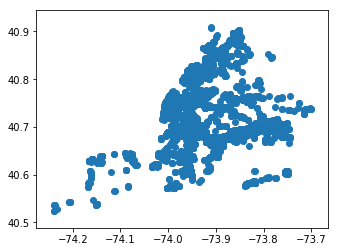

In [34]:
edes_shp.plot()

In [35]:
edes_shp.head()

,bbl,boro,borocode,ceqr_num,enumber,taxblock,taxlot,ulurp_num,geometry
0,3023000005,3,3.0,04DCP003K,E-138,2300.0,5.0,"050110 ZRK, 050111 ZMK, 050415 MMK, 040416 MMK...",POINT (-73.95277455716088 40.71821777430975)
1,1002180014,1,1.0,06DCP067M,E-162,218.0,14.0,040543ZMM,POINT (-74.01078919030999 40.72238370282597)
2,1003440141,1,1.0,07DCP078M,E-216,344.0,141.0,080397ZMM,POINT (-73.98456341509758 40.71951592208949)
3,4000300005,4,4.0,04DCP011Q,E-129,30.0,5.0,"040272 ZRQ, 040273 ZMQ",POINT (-73.95418116296682 40.74443782671774)
4,3053000074,3,3.0,10DCP029K,E-252,5300.0,74.0,100345zmk,POINT (-73.98505323325966 40.64115768183036)


In [36]:
edes_shp_noise = edes_shp[edes_shp['enumber'].isin(noise_list)]
edes_shp_non_noise = edes_shp[~edes_shp['enumber'].isin(noise_list)]

In [37]:
urllib.request.urlretrieve("https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile", "puma.zip")
zip_ref = zipfile.ZipFile("puma.zip", 'r')
zip_ref.extractall()
zip_ref.close()
pumashp = gpd.GeoDataFrame.from_file("geo_export_6849fede-7929-4634-8cdb-6f2cc32e425d.shp")

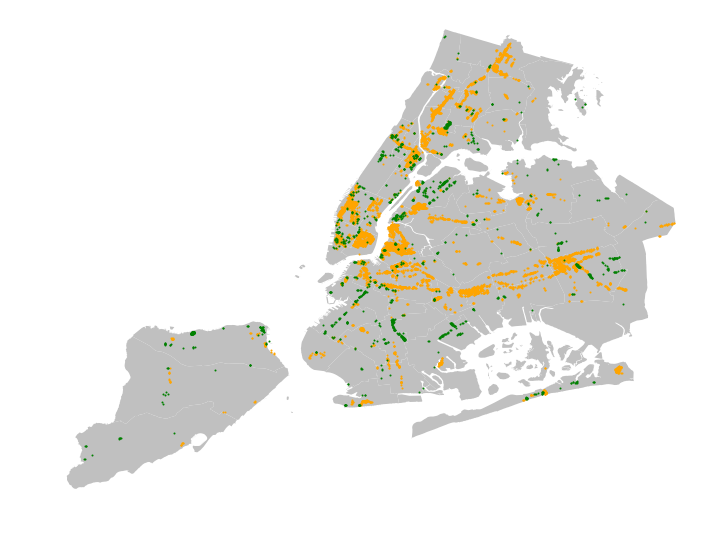

In [44]:
base = pumashp.plot(figsize=(12,12),color='silver')
base.axis('off')
edes_shp_noise.plot(ax=base, marker='o', color='orange', markersize=1)
edes_shp_non_noise.plot(ax=base, marker='o', color='green', markersize=1)

In [2]:
a = ['hello','siddhanth']
list(a)

['hello', 'siddhanth']

In [3]:
set(list(a[0]))

{'e', 'h', 'l', 'o'}